In [3]:
img_path = 'dataset/val/gt_gray/034.png'

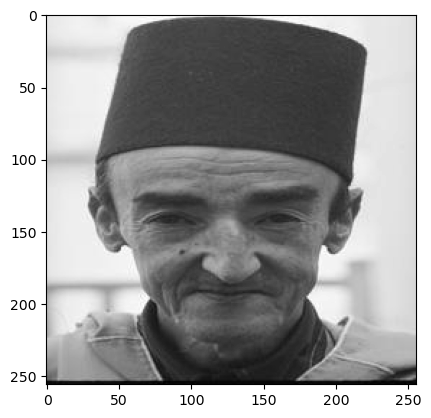

In [4]:
# show image
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open(img_path)
plt.imshow(img, cmap='gray')
plt.show()

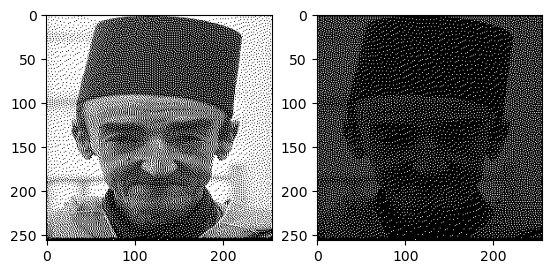

In [8]:
import numpy as np
from PIL import Image
import cv2
img = cv2.imread(img_path)
ht = Image.fromarray(img).convert('1')
pre_evcs = np.interp(img, (0, 255), (0, 255/4))
evcs = Image.fromarray(pre_evcs.astype(np.uint8)).convert('1')
#show ht and evcs in one line
fig, ax = plt.subplots(1, 2)
ax[0].imshow(ht, cmap='gray')
ax[1].imshow(evcs, cmap='gray')
plt.show()

In [80]:
import cv2
def Inv_HT(img_ht, radius=3, sigma_s=300, cnts=3):
    halftone = img_ht.copy()
    I = cv2.GaussianBlur(halftone, (radius, radius), 0)
    for i in range(cnts):
        I = cv2.bilateralFilter(I, radius, sigma_s, sigma_s)
    ehist = cv2.equalizeHist(I)
    return halftone, I, ehist

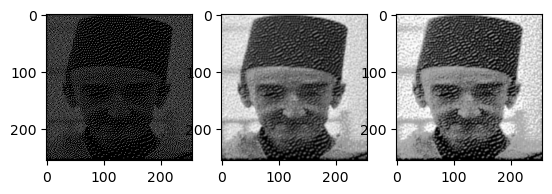

In [81]:
ht, inv_ht, ehist = Inv_HT((np.array(evcs)*255).astype(np.uint8))
inv_ht = Image.fromarray(inv_ht)
ehist = Image.fromarray(ehist)
ht = Image.fromarray(ht)
fig, ax = plt.subplots(1, 3)
ax[0].imshow(ht, cmap='gray')
ax[1].imshow(inv_ht, cmap='gray')
ax[2].imshow(ehist, cmap='gray')
plt.show()